In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["green", "blue","red"]
sns.set(font_scale=1.5,style='whitegrid')

In [2]:
rep_addr = './Fashion/rep_records/'
threshold_1_addr = rep_addr+'threshold_0.1/'
threshold_2_addr = rep_addr+'threshold_0.2/'
threshold_5_addr = rep_addr+'threshold_0.5/'
weight_addr = rep_addr+'weight/'

In [3]:
imbalance_list = [0.1,0.2,0.5,0.9]
byzantine_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# 测试

In [4]:
temp_untargeted_df = pd.read_csv(weight_addr+"untargeted_i_0.2_b_0.5.csv",index_col=0)

In [5]:
temp_random_df = pd.read_csv(weight_addr+"random_i_0.2_b_0.5.csv",index_col=0)

In [6]:
untargeted_df = temp_untargeted_df.iloc[:,25:50]
benign_df = temp_untargeted_df.iloc[:,0:25]
random_df = temp_random_df.iloc[:,25:50]

In [7]:
untargeted_mean = untargeted_df.mean(1)
random_mean = random_df.mean(1)
benign_mean = benign_df.mean(1)

In [8]:
all_rep = list(untargeted_mean)+list(random_mean)+list(benign_mean)
all_round = list(range(11))*3
all_type = ['Untargeted Attack']*11 + ['Random Attack']*11 + ['No Attack']*11
all_df = pd.DataFrame([all_rep, all_round, all_type])

In [9]:
all_df=all_df.T
all_df.columns = ['Average Reputation','Round','Type']

<AxesSubplot:xlabel='Round', ylabel='Average Reputation'>

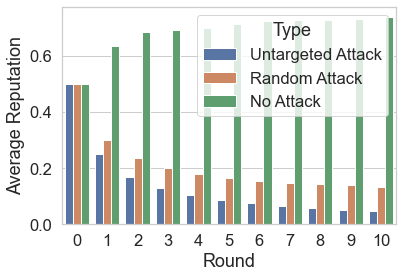

In [10]:
sns.barplot(data=all_df, x='Round', y='Average Reputation', hue='Type')

In [11]:
all_rep = [list(range(11)),list(untargeted_mean),list(random_mean),list(benign_mean)]
all_df = pd.DataFrame(all_rep)

In [12]:
all_df=all_df.T
all_df.columns = ['Round','Untargeted','Random','Benign']

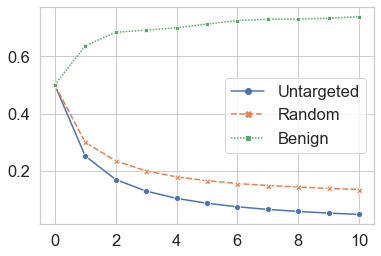

In [13]:
dd=[all_df['Untargeted'],all_df['Random'],all_df['Benign']]
ax = sns.lineplot(data=dd,markers=True,)
plt.show()

In [14]:
def plot_rep(imbalance,addr):
    temp_untargeted_df = pd.read_csv(weight_addr+"untargeted_i_"+str(imbalance)+"_b_0.5.csv",index_col=0)
    temp_random_df = pd.read_csv(weight_addr+"random_i_"+str(imbalance)+"_b_0.5.csv",index_col=0)
    
    untargeted_df = temp_untargeted_df.iloc[:,25:50]
    benign_df = temp_untargeted_df.iloc[:,0:25]
    random_df = temp_random_df.iloc[:,25:50]
    
    untargeted_mean = untargeted_df.mean(1)
    random_mean = random_df.mean(1)
    benign_mean = benign_df.mean(1)
    all_rep = list(untargeted_mean)+list(random_mean)+list(benign_mean)
    all_round = list(range(11))*3
    all_type = ['Untargeted Attack']*11 + ['Random Attack']*11 + ['No Attack']*11
    all_df = pd.DataFrame([all_rep, all_round, all_type])
    
    all_df=all_df.T
    all_df.columns = ['Average Reputation','Round','Type']
    
    #bx = sns.barplot(data=all_df, x='Round', y='Average Reputation', hue='Type')
    #plt.show()
    
    all_rep = [list(range(11)),list(untargeted_mean),list(random_mean),list(benign_mean)]
    all_df = pd.DataFrame(all_rep)
    #plt.figure(figsize=(10, 8), dpi=200)
    all_df=all_df.T
    all_df.columns = ['Round','Untargeted','Random','Benign']
    
    dd=[all_df['Benign'],all_df['Random'],all_df['Untargeted']]
    ax = sns.lineplot(data=dd,markers=True,palette=sns.xkcd_palette(colors), linewidth=2.5)
    
                                                                        
    ax.spines['top'].set_color('black')  # 设置上‘脊梁’为红色
    ax.spines['right'].set_color('black')  # 设置上‘脊梁’为无色
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')                                                       
                        
    ax.set_xlabel('Round')
    ax.set_ylabel('Reputation')
    
    plt.savefig(addr+"/rep_fashion_imbalance_"+str(imbalance)[-1]+".pdf", bbox_inches='tight')

    plt.show()

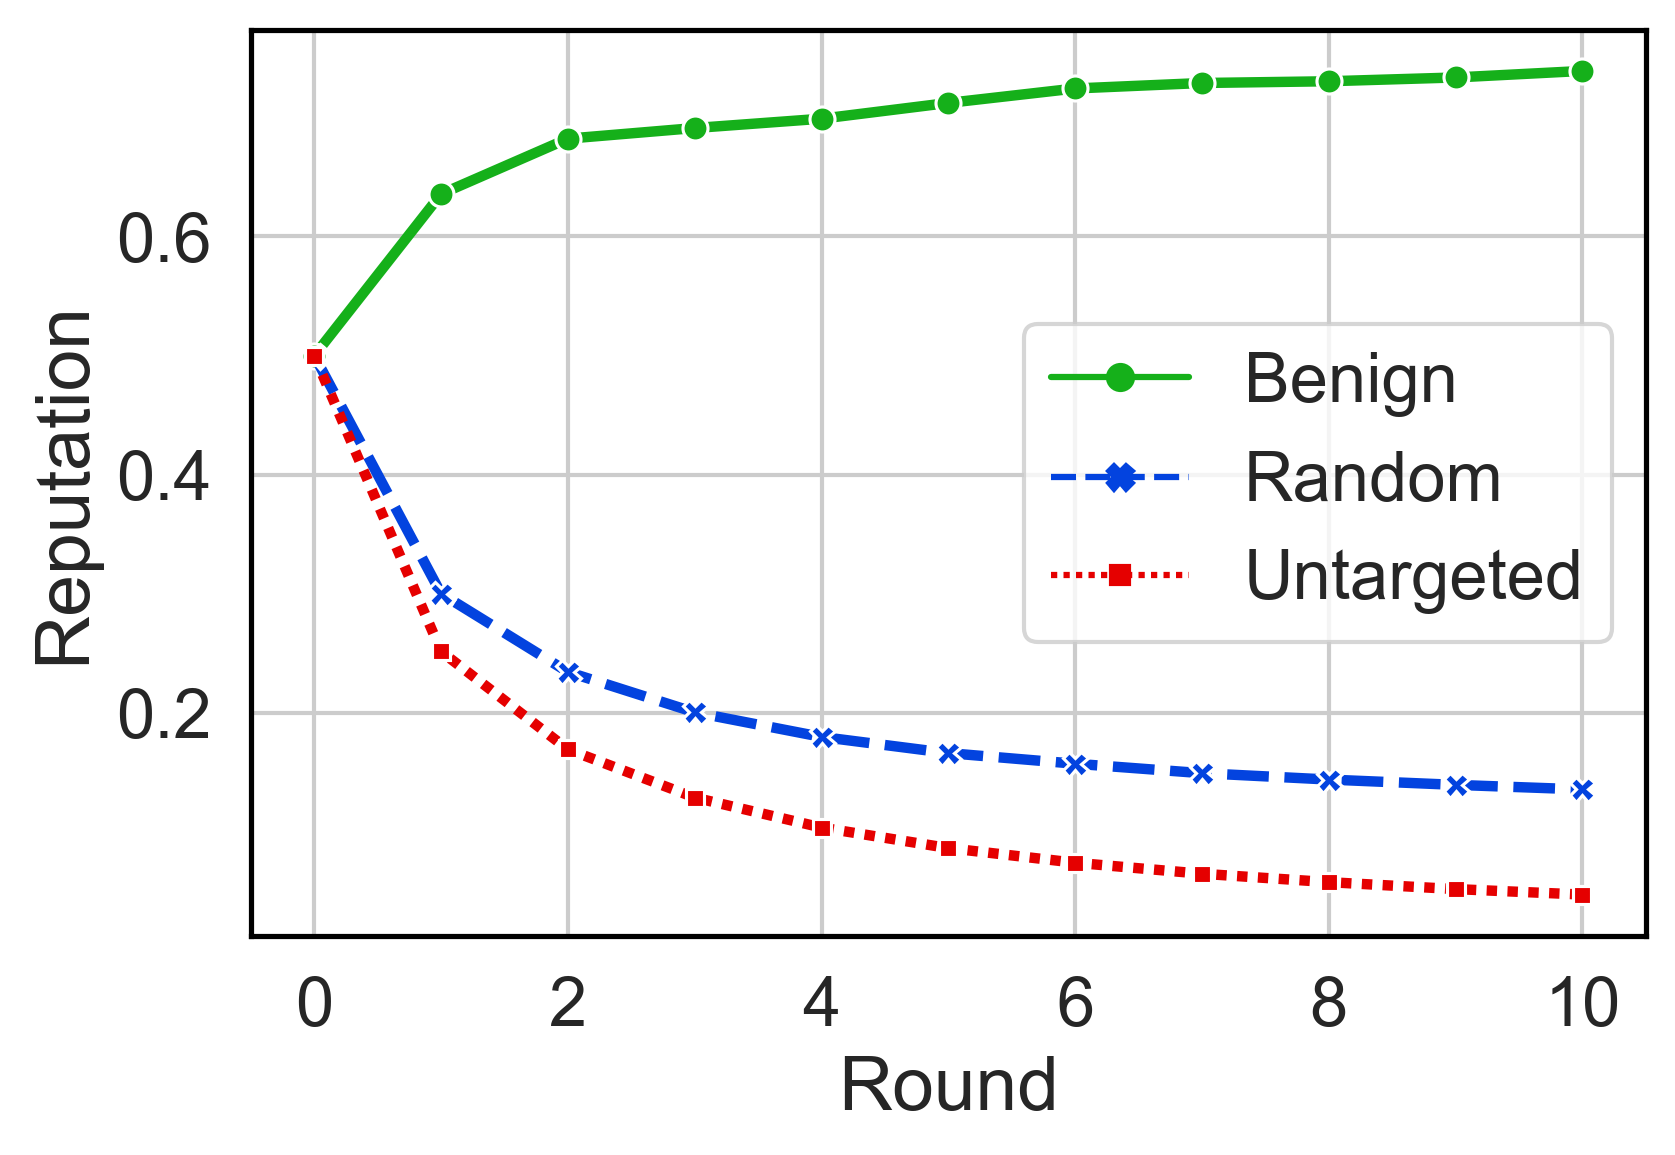

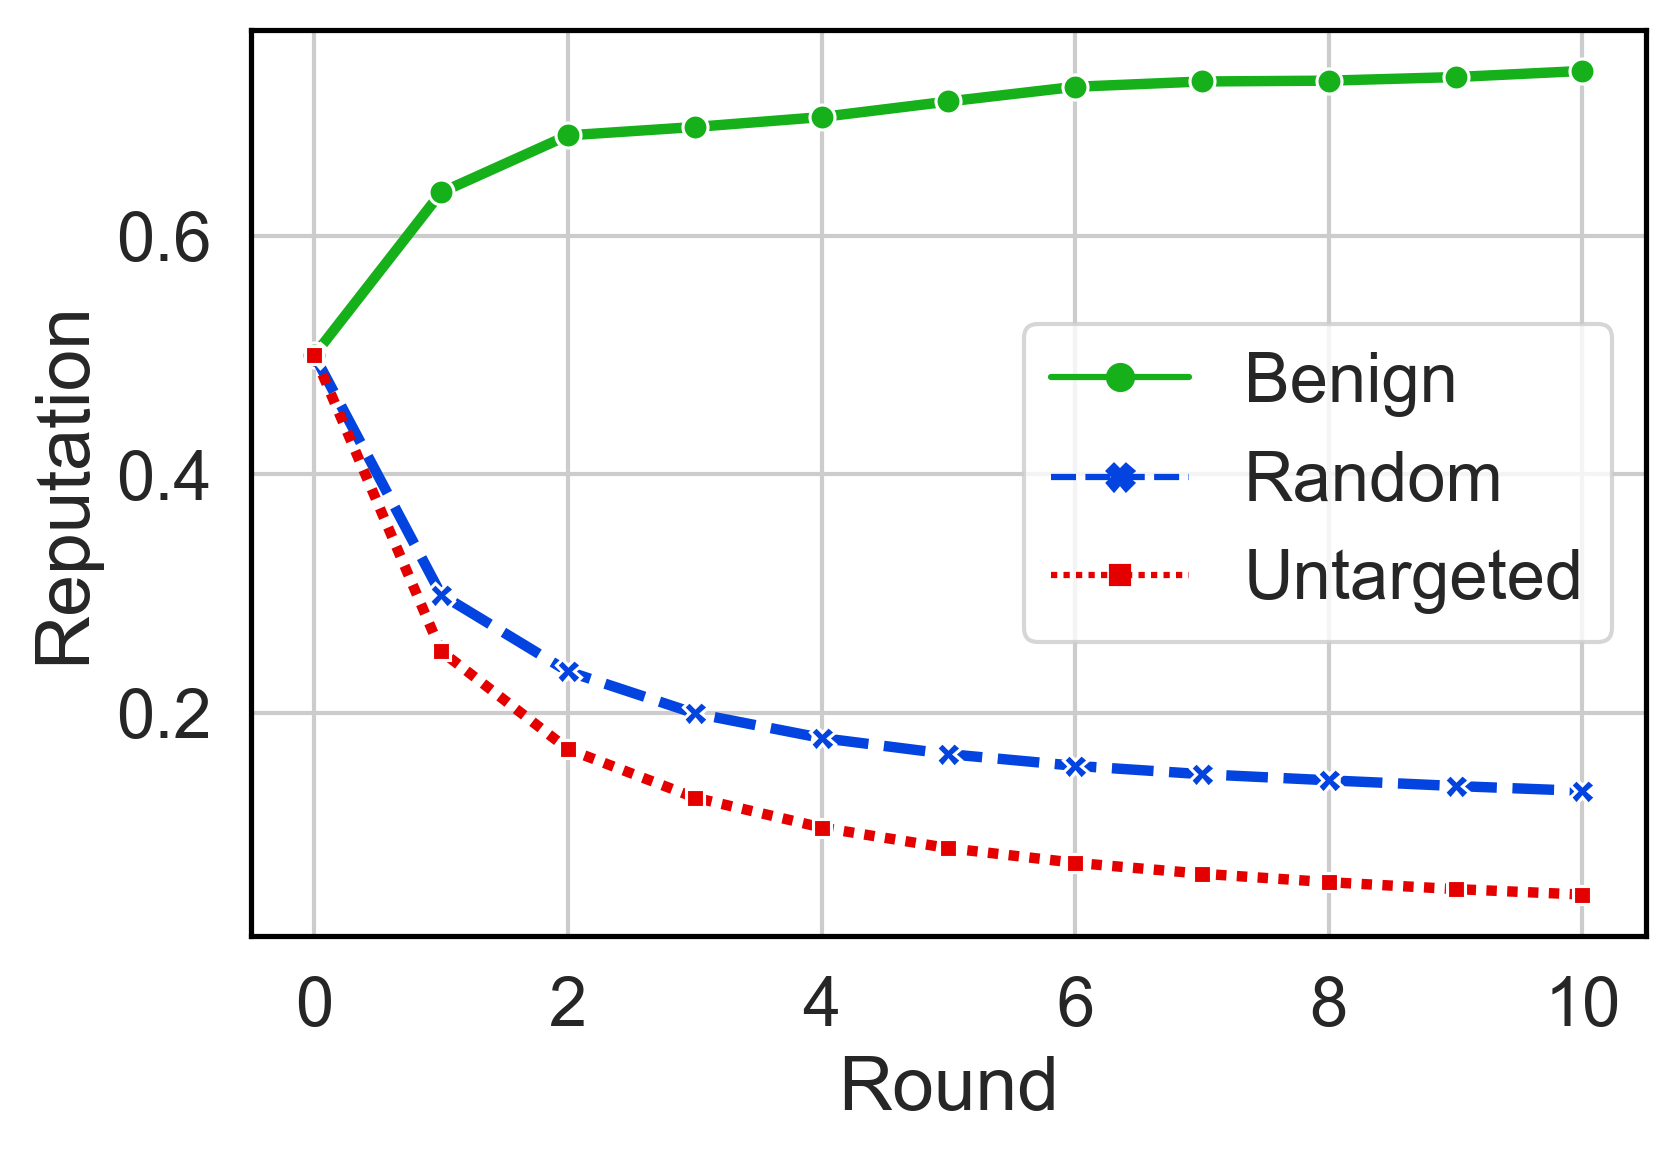

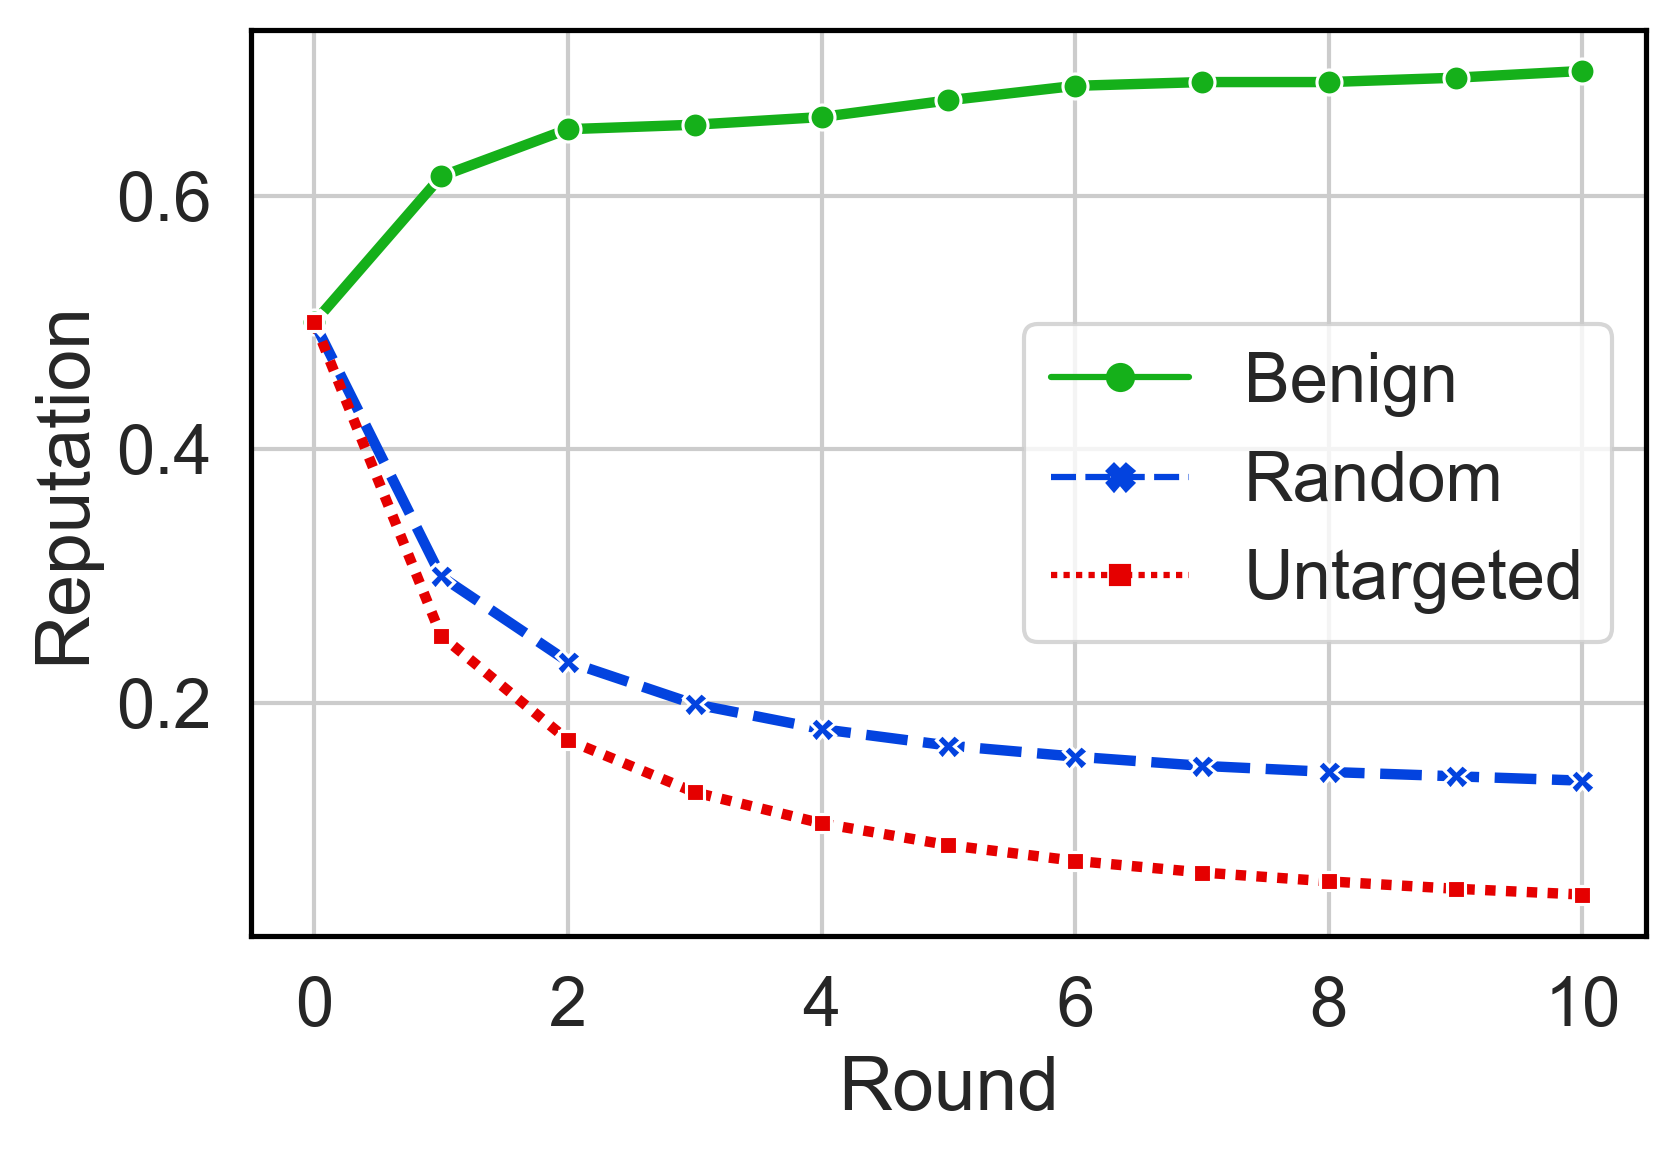

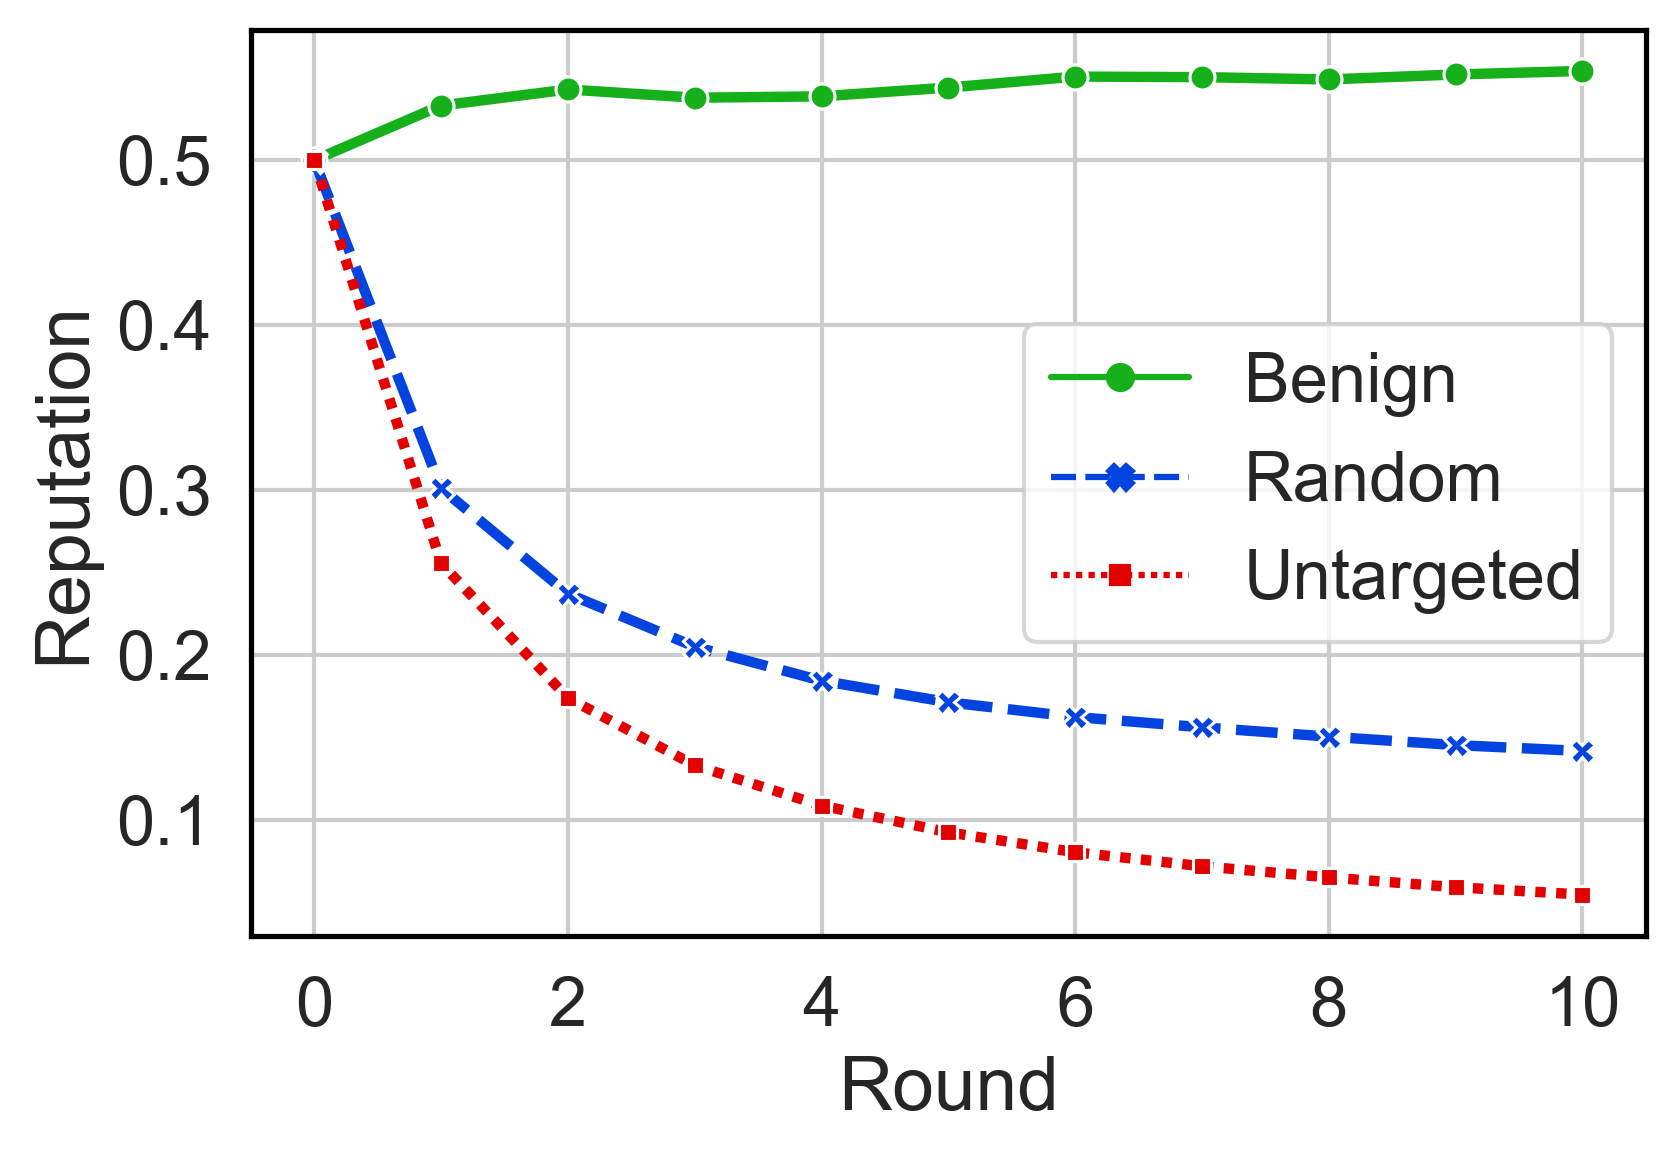

In [15]:
for i in imbalance_list:
    plt.figure(dpi=300)
    plot_rep(i,'./plots/rep_pdf')